## CS345 Fall 2022 Assignment 1

Last update: 9/11/22 at 11am

In [1]:
import numpy as np
from matplotlib import pyplot as plt

### Part 1:  playing with labeled data

In this part of the assignment we will experiment with scikit-learn's functionality for creating toy datasets [make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html).
Consider the following two datasets created with this function:

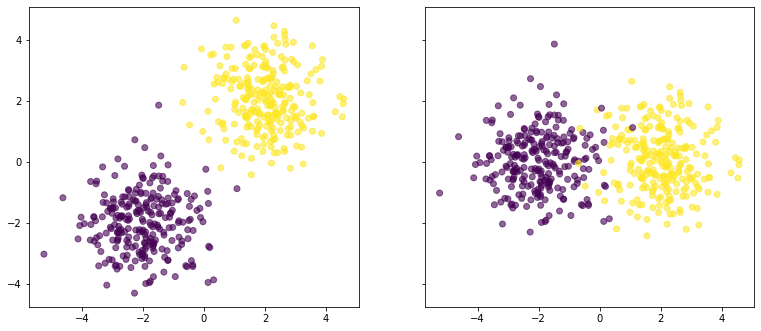

In [2]:
from sklearn.datasets import make_blobs

N = 500
seed = 42

# create the first dataset:
centers = [[-2,-2],[2,2]]
X1, y1 = make_blobs(n_samples=N, centers=centers, random_state=42)

# create the second dataset:
centers = [[-2,0],[2,0]]
X2, y2 = make_blobs(n_samples=N, centers=centers, random_state=42)

fig, (ax1,ax2) = plt.subplots(1, 2, sharey='row', figsize=(13,6))
ax1.scatter(X1[:, 0], X1[:, 1], c=y1, alpha=0.6);
ax1.set_aspect('equal')
ax2.scatter(X2[:, 0], X2[:, 1], c=y2, alpha=0.6);
ax2.set_aspect('equal')


#### Feature visualization

Plot histograms of the individual features in each of the two datasets generated above, color-coded by class, similarly to the way we visualized the iris dataset in our first notebook on labeled data.  Use matplotlib's [hist](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) function to generate the histogram and use the ''density=True'' option to generated a histogram normalized to be a distribution.
In plotting, use [subplots](http://matplotlib.org/examples/pylab_examples/subplots_demo.html), as a convenient way of grouping together related plots.

Comment on the differences between the histograms, and relate them to the parameters provided to `make_blobs`.  More specifically, explain why the 2nd feature of the dataset shown on the right (namely, its y-axis), is not useful for classification purposes, and what is it about the parameters provided to `make_blobs` that made it so.

(array([[0.00407555, 0.00407555, 0.0163022 , 0.06928434, 0.13856869,
         0.14671979, 0.21192858, 0.19155083, 0.11003984, 0.08558654,
         0.05298215, 0.06520879, 0.08558654, 0.17932418, 0.20785303,
         0.22007968, 0.14264424, 0.06113324, 0.0244533 , 0.02037775],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.0081511 , 0.04483105, 0.12634204, 0.21600413, 0.37087502,
         0.34642172, 0.37087502, 0.29343957, 0.13856869, 0.08966209,
         0.02037775, 0.0081511 , 0.        , 0.00407555, 0.        ]]),
 array([-5.24126734, -4.75053598, -4.25980463, -3.76907327, -3.27834191,
        -2.78761055, -2.2968792 , -1.80614784, -1.31541648, -0.82468513,
        -0.33395377,  0.15677759,  0.64750895,  1.1382403 ,  1.62897166,
         2.11970302,  2.61043437,  3.10116573,  3.59189709,  4.08262845,
         4.5733598 ]),
 <a list of 2 BarContainer objects>)

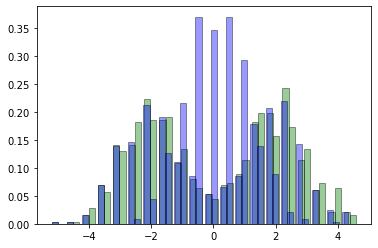

In [3]:
# your code here

from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

N = 500
seed = 42

# create the first dataset:
centers = [[-2,-2],[2,2]]
X1, y1 = make_blobs(n_samples=N, centers=centers, random_state=42)

# create the second dataset:
centers = [[-2,0],[2,0]]
X2, y2 = make_blobs(n_samples=N, centers=centers, random_state=42)

bins = 20
plt.hist(X1, bins, density=True, facecolor='green', alpha=0.4, 
         edgecolor = 'black', label='hist1')
plt.hist(X2, bins, density=True, facecolor='blue', alpha=0.4, 
         edgecolor = 'black', label='hist2')

# The two histograms do a good job modeling the above graphs.
# The green histogram models the first blob model which is clearly two normal models that have decent spaceing between them
# making to normal curves. The blue histogram models the second blob model and in that, the two blobs over lap each other.
# This causes the large spike in the middle of the blue histogram.

*Discussion of the plots here*.

### Part 2:  Exploring the Palmer Penguins dataset

In this part of the assignment we will analyze the [Palmer Penguins dataset](https://github.com/allisonhorst/palmerpenguins/), which measures the characteristics of three species of penguins:

<img style="padding: 10px; float:center;" alt="broadcasting" src="https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png" width="500">

The data contains multiple characteristics of a penguin:  its species,  sex, the island on which it was observed, and other measurments.
We will be interested in looking at four specific characteristics:
bill length, bill depth, flipper length, and body mass.

<img style="padding: 10px; float:center;" alt="broadcasting" src="https://allisonhorst.github.io/palmerpenguins/reference/figures/culmen_depth.png" width="400">


#### Reading the data

The dataset is stored in three CSV files, one for each species of penguins.
We will use NumPy's [genfromtxt](https://numpy.org/doc/stable/reference/generated/numpy.genfromtxt.html) to read the CSV files directly from the URL in which they are stored without having to first download the data to your computer.
The following command will read in the data for the four characteristics we are interested in for the Adelie species of penguins:

In [4]:
import pandas as pd
adelie_data_url = "https://portal.edirepository.org/nis/dataviewer?packageid=knb-lter-pal.219.5&entityid=002f3893385f710df69eeebe893144ff"
#adelie_data=np.genfromtxt(adelie_data_url, delimiter=',', usecols=range(10,14), 
#                          skip_header=True)
adelie_data = pd.read_csv(adelie_data_url, usecols=range(9,13)).values
print(adelie_data.shape)

(152, 4)


If you put that URL in your browser, this will download a CSV file to your computer.  We recommend doing that so you can see how the data file looks like.
Also note that the data contains `NaN` values.  We will ask that you remove all examples for which one or more of the feature values are `NaN`.
Here are the urls for the other species of penguins:

In [5]:
gentoo_data_url = "https://portal.edirepository.org/nis/dataviewer?packageid=knb-lter-pal.220.5&entityid=e03b43c924f226486f2f0ab6709d2381"
chinstrap_data_url = "https://portal.edirepository.org/nis/dataviewer?packageid=knb-lter-pal.221.6&entityid=fe853aa8f7a59aa84cdd3197619ef462"

#chinstrap_data=np.genfromtxt(chinstrap_data_url, delimiter=',', usecols=range(10,14), 
#                          skip_header=True)
chinstrap_data = pd.read_csv(chinstrap_data_url, usecols=range(9,13)).values
gentoo_data = pd.read_csv(gentoo_data_url, usecols=range(9,13)).values
chinstrap_data = pd.read_csv(chinstrap_data_url, usecols=range(9,13)).values

In [6]:
print(chinstrap_data.shape,gentoo_data.shape)

(68, 4) (124, 4)


### Creating a labeled dataset

Your first task is to create a labeled dataset, from the three CSV files in the links above that represents a classification problem with a class label that represents the species of a penguin; in other words, you will have a feature matrix with the four variables that you extract from the CSV file, and a label for each row in the matrix which indicates which species of penguin it is.  Use the numbers 0,1,2 to represent the species Adelie, Gentoo, and Chinstrap, respectively.
Similar to how scikit-learn packages the iris dataset using a function [load_iris](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html), we ask that you write a function called `load_penguins` with the following behavior:

In [7]:
import pandas as pd

def load_penguins() :
    """
    returns a two dimensional array representing the feature matrix
    of the data and a one dimensional array that contains the lables
    
    Example usage:
    X,y = load_penguins()
    the array X is a two dimensional array and y is a one dimensional 
    array such that y[i] is the label for X[i]
    """
    adelie_data_url = "https://portal.edirepository.org/nis/dataviewer?packageid=knb-lter-pal.219.5&entityid=002f3893385f710df69eeebe893144ff"
    gentoo_data_url = "https://portal.edirepository.org/nis/dataviewer?packageid=knb-lter-pal.220.5&entityid=e03b43c924f226486f2f0ab6709d2381"
    chinstrap_data_url = "https://portal.edirepository.org/nis/dataviewer?packageid=knb-lter-pal.221.6&entityid=fe853aa8f7a59aa84cdd3197619ef462"
    adelie_data = pd.read_csv(adelie_data_url, usecols=range(9,13)).values
    chinstrap_data = pd.read_csv(chinstrap_data_url, usecols=range(9,13)).values
    gentoo_data = pd.read_csv(gentoo_data_url, usecols=range(9,13)).values
    
    adelie_data = adelie_data[~np.isnan(adelie_data).any(axis=1), :]
    chinstrap_data = chinstrap_data[~np.isnan(chinstrap_data).any(axis=1), :]
    gentoo_data = gentoo_data[~np.isnan(gentoo_data).any(axis=1), :]
    
    adelieLen = adelie_data.shape[0]
    chinstrapLen = chinstrap_data.shape[0]
    gentooLen = gentoo_data.shape[0]
    
    temp = np.concatenate((adelie_data,chinstrap_data),axis=0)
    penguin = np.concatenate((temp,gentoo_data),axis=0)
    
    label = np.zeros(adelieLen+chinstrapLen+gentooLen)
    
    label[adelieLen:] = 1
    label[(adelieLen+chinstrapLen):] = 2
    
    return (penguin, label) 

In [8]:
X, y = load_penguins()

# your code had better pass the following tests:
try :
    # the feature matrix matches the vector of labels in length:
    assert len(X) == len(y)
    # the number of features is equal to 4:
    assert len(X[0]) == 4
    # missing values have been removed:
    assert np.sum(np.isnan(X)) == 0
except :
    print("there are some issues in your data")

### Feature visualization


As described above, your dataset will contain the following four features:
culmen length, culmen width, flipper length, and body mass.
Suppose you wanted to design a machine learning algorithm that predicts the species of a penguin based on two out of the four features, and for simplicity assume you need to choose between the following combinations:
culmen length and culmen width or flipper length and and body mass.
Visualize the data using scatter plots color-coded by species of penguin to make that decision.  Use Matplotlib's [scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) function for this purpose.
Explain your choice!
Now, what is the single most predictive feature amonth the four?
To determine that, plot histograms of the four features color coded by species like we did for the iris dataset using Matplotlib's [hist](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) function.
In plotting, use [subplots](http://matplotlib.org/examples/pylab_examples/subplots_demo.html), as a convenient way of grouping together related plots.


**your answer here**

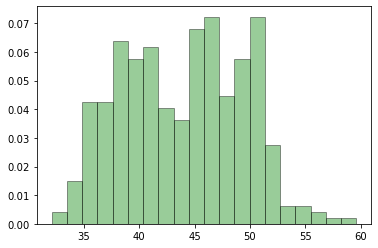

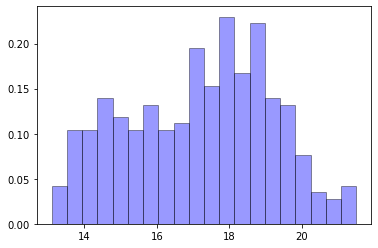

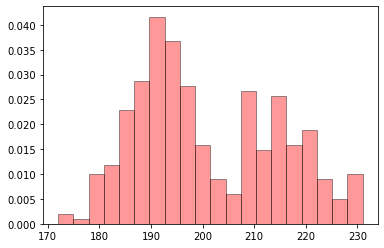

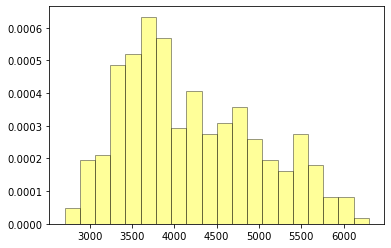

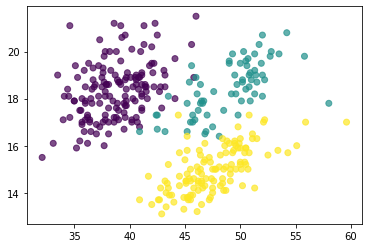

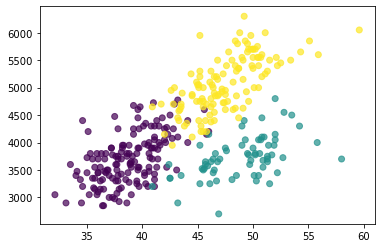

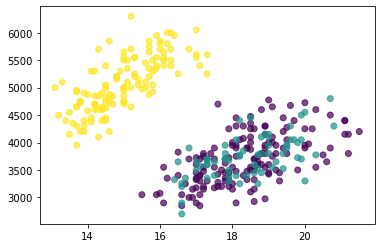

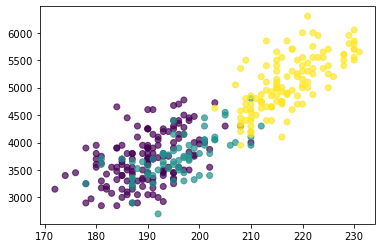

In [9]:
# it should include relevant plots and the Python code to generate them
import matplotlib.pyplot as plt

bins = 20
plt.figure(1)
plt.hist(X[:,0], bins, density=True, facecolor='green', alpha=0.4, 
         edgecolor = 'black', label='Culmen Length')
plt.figure(2)
plt.hist(X[:,1], bins, density=True, facecolor='blue', alpha=0.4, 
         edgecolor = 'black', label='Culmen Depth')
plt.figure(3)
plt.hist(X[:,2], bins, density=True, facecolor='red', alpha=0.4, 
         edgecolor = 'black', label='Flipper Length')
plt.figure(4)
plt.hist(X[:,3], bins, density=True, facecolor='yellow', alpha=0.4, 
         edgecolor = 'black', label='Body Mass')
plt.figure(5)
plt.scatter(X[:,0], X[:,1], c=y, alpha=0.7)
plt.figure(6)
plt.scatter(X[:,0], X[:,3], c=y, alpha=0.7)
plt.figure(7)
plt.scatter(X[:,1], X[:,3], c=y, alpha=0.7)
plt.figure(8)
plt.scatter(X[:,2], X[:,3], c=y, alpha=0.7)


### Part 3:  Splitting data into train and test sets

Whenever you train and evaluate a machine learning classifier, you need to split your data into separate training and test sets.

Implement a method called `train_test_split`, whose api is specified below, which splits a dataset into train and test sets.

In your implementation you can use the NumPy [permutation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.permutation.html) or [shuffle](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.shuffle.html) functions.
Once you have done that, create data for a binary classification problem, e.g. using the scikit-learn [make_classification](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) function; divide the data into train/test sets using the code you wrote and create a scatter plot that illustrates the division of the data into training and test sets.  For the scatter plot, use Matplotlib's [scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html).
Use color to represent which dataset a data point belongs to (train/test) rather than which class it belongs to.
What can you conclude from the plot you have generated?

**Do not** use the scikit-learn [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) method for your implementation.

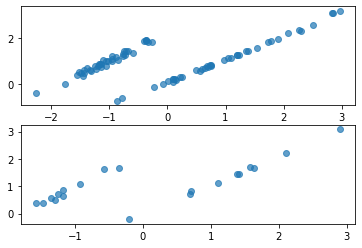

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

def train_test_split(X, y, test_fraction=0.2):
    """
    split the given dataset into training and test sets
    
    arguments:
        X - two dimensional NumPy array that contains the feature matrix
        y - a NumPy array that contains the labels
        test_fraction - the fraction of data to be used as the test set.
        This is a number between 0 and 1.
    
    return value:
        the function returns a tuple of four NumPy arrays:
        X_train,y_train,X_test,y_test where X_train,y_train are 
        the features and labels for the training set and X_test,y_test
        are the features and labels for the test set.
        
    num_of_rows = (enter your number here) * 0.8

    np.random_shuffle(X_data) #shuffles data to make it random
    train_data = X_data.iloc[:num_of_rows] #for training data
    test_data = X_data.iloc[num_of_rows:] #for test data
    train_data.sort() # sorts data
    test_data.sort()
    plt.scatter(train_data, test_data)
    plt.show()
    """
    nrows = (int)(X.shape[0] * test_fraction)
    rng = np.random.default_rng()
    
    randX = rng.permutation(X)
    
    testX = randX[:nrows]
    trainX = randX[nrows:]
    
    testX.sort()
    trainX.sort()
    
    return (trainX, y, testX, y)

# example function call:
X,y = make_classification(n_samples = 100, n_features = 2, n_informative = 2, 
                          n_redundant = 0, n_repeated= 0, n_classes = 2, 
                          n_clusters_per_class = 1, class_sep = 1, flip_y = 0, random_state = 42)


X_train,y_train,X_test,y_test = train_test_split(X, y, 0.2)

plt.subplot(211)
plt.scatter(X_train[:,0], X_train[:,1], alpha=0.7)
plt.subplot(212)
plt.scatter(X_test[:,0],X_test[:,1], alpha=0.7)


### Part 4:  measuring classifier accuracy/error

**Preliminaries**.  We'll start with a review of the notation used to reprsent a dataset. In supervised learning we work with a dataset of $N$ labeled examples: $\mathcal{D} = \{ (\mathbf{x}_i, y_i) \}_{i=1}^N$, where $\mathbf{x}_i$ is a $d$-dimensional vector (we always use boldface to denote vectors), and $y_i$ is the label associated with $\mathbf{x}_i$.  In a binary classification problem we'll usually use the values $\pm 1$ or $\{0,1\}$ to denote class labels.

**Classifier accuracy**.  Let $(y_1,\ldots,y_N)$ be the true labels for a dataset for which you have predicted labels $(\hat{y}_1,\ldots,\hat{y}_N)$.
We quantify the accuracy of a classifier as:

$$
\mathrm{accuracy} = \frac{1}{N}\sum_{i=1}^N \left[\hat{y}_i = y_i\right].
$$
Here the notation $\left[\mathrm{condition}\right]$ is the [Iverson bracket](https://en.wikipedia.org/wiki/Iverson_bracket), which is equal to 1 if the condition is true, and 0 otherwise.
Also note that the equality sign in this formula corresponds to the programming `==` operator.

To compute an estimate of accuracy we pick an independent test set that was not used during training and compute the accuracy of the classifier on this dataset (the test set).

Let's define a classifier called the **majority classifier**.  This classifier ignores the input features and always classifies examples as belonging to the majority class, i.e. the class to which the largest number of training examples belong to.  

With these definitions in mind, answer the following:

  * Suppose you have data for a binary classification problem that is highly imbalanced, i.e. one class is more highly represented than the other.  For concretenss, let's assume  let's assume the number of negative examples is much larger than the number of positive examples, and suppose 95% of the examples are negative.  What can you say about the estimated accuracy of the majority classifier?

**The estimated accuracy will be inaccurate because the majority classifier will be ignoring %5 of the data. However, the estimated accuracy will stll be high due to lots of the values being ignored. I would ultimately say that there would be a error rate of 5%, which is considerable. You could also say you are ignoring outliers which could be a good thing. In this case, since that labels are either true or false you would be ignoring false labels.**

* With your previous answer in mind, is accuracy a good way of evaluating the performance of a classifier on unbalanced data?  Explain!

**In unbalanced data, it is not a good way to evaluate data due some data being ignored. It is like taking a class average but ignoring the people who bombed the class because 90 percent of the class got Bs. It would create a lot of bias in the evaulation of data sets.**

### Your Report

Please answer the questions in the cells reserved for that purpose.  


### Submission

Submit your report as a Jupyter notebook via Canvas. Running the notebook should generate all the plots in your notebook.

### Grading 

Although we will not grade on a 100 pt scale, the following is a grading sheet that will help you in doing that:  

```
Grading sheet for assignment 1

Part 1:  25 points.
Part 2:  30 points.
  Assembling the data:  10 pts
  Creation of histograms/scatterplots of features: 10 points
  Discussion of the plots: 10 points
Part 3:  25 points
Part 4:  20 points.

```

Grading will be based on the following criteria:

  * Code correctness.
  * Plots are well formatted and easy to understand.
  * Interesting and meaningful observations made where requested.
  * Notebook is readable, well-organized, and concise.